In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
# rm -rf '/content/NT'

In [2]:
import os
!unzip '/content/gdrive/MyDrive/vid_df_DCT.zip'


Streaming output truncated to the last 5000 lines.
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0089.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0090.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0091.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0092.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0093.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0094.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0095.npy  
  inflating: vid_df/Fake/mpdf0_sa2/frame_COEFF_0096.npy  
   creating: vid_df/Fake/fcft0_sa2/
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0001.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0002.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0003.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0004.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0005.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0006.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_COEFF_0007.npy  
  inflating: vid_df/Fake/fcft0_sa2/frame_CO

In [5]:
# rm -rf '/content/FF'

In [6]:
# import os
# import matplotlib.pyplot as plt
# import cv2
# file_path = '../../../Data/Celeb_DF/SRM'
# cnt = 0

# for dirs, subdirs, files in os.walk(file_path):
#     for file in files:
#         img_path = os.path.join(dirs, file)
#         cnt += 1
# print(f'Total {cnt} images Loaded')

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.callbacks import Callback

In [4]:
Encode = {
    'Fake':0,
    'Real':1
}

In [5]:
# import shutil
import os
import numpy as np
from PIL import Image

images = []
labels = []
total_images = 0
for dirs,subdirs,files in os.walk('/content/vid_df'):
  cnt = 0
  cnt_img = 0
  for file in files:
    img_path = os.path.join(dirs,file)
    img_data = np.load(img_path)
    img_data = img_data.flatten(order='C')
    st = img_path.split('/')
    # print(st[4])
    cnt_img += 1
    total_images += 1
    labels.append(Encode[st[3]])
    # print(img_path)
    # break
    images.append(img_data)
    if total_images >= 160000 or cnt_img == 250:
        break
    if cnt == 80000:
        break
  if total_images >= 160000:
        print(total_images)
        break
print(f'Total Images: {len(images)}')

Total Images: 68025


In [6]:
from sklearn.model_selection import train_test_split
images = np.array(images,dtype=np.float32) / 255.0
labels = np.array(labels)
image_train,image_test,y_train,y_test = train_test_split(
    images,labels,test_size=0.2,random_state=42,
)
del images,labels

In [7]:
image_train.shape

(54420, 256)

In [8]:
import tensorflow as tf

def build_model():
  Inputs = tf.keras.layers.Input(shape=(256,1) , name = 'DCT_Input')
  x_dct = tf.keras.layers.Conv1D(100,3,activation='relu',padding='same')(Inputs)
  x_dct = tf.keras.layers.Conv1D(100,3,activation='relu',padding='same')(x_dct)
  x_dct = tf.keras.layers.MaxPooling1D(2)(x_dct)
  x_dct = tf.keras.layers.Conv1D(100,3,activation='relu',padding='same')(x_dct)
  x_dct = tf.keras.layers.Conv1D(100,3,activation='relu',padding='same')(x_dct)
  x_dct = tf.keras.layers.MaxPooling1D(2)(x_dct)


  flatten_dct = tf.keras.layers.Flatten()(x_dct)
  combined = tf.keras.layers.Dense(256, activation='relu')(flatten_dct)
  combined = tf.keras.layers.Dropout(0.5)(combined)

  output = tf.keras.layers.Dense(1, activation='sigmoid')(combined)
  model = tf.keras.models.Model(inputs=Inputs, outputs=output)
  return model
model = build_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ DCT_Input (InputLayer)          │ (None, 256, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 256, 100)       │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 256, 100)       │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 128, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 128, 100)       │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 128, 100)       │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 64, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729,613 (6.60 MB)

 Trainable params: 1,729,613 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# from tensorflow.keras import backend as K

In [14]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                             min_delta=0,
#                                             patience=5,
#                                             mode="max",
#                                             restore_best_weights=True,
#                                             start_from_epoch=2,)

In [9]:
class MinDiffCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, filepath, monitor='val_accuracy', prev_val = -10**9 ,min_delta=0.02):
        super(MinDiffCheckpoint, self).__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.min_delta = min_delta  # Minimum acceptable difference
        self.best_diff = np.inf  # Initialize with infinity
        self.best_weights = None
        self.prev_val = prev_val

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        # Get current metrics
        val_acc = logs.get('val_accuracy')
        train_acc = logs.get('accuracy')

        if val_acc is None or train_acc is None:
            return

        # Calculate absolute difference
        current_diff = abs(train_acc - val_acc)

        # Check if difference is below threshold and better than previous best
        if current_diff < self.min_delta or current_diff < self.best_diff:

            # Save the model
            if self.prev_val < val_acc:
                self.prev_val=val_acc
                self.model.save_weights(self.filepath, overwrite=True)
                print(f"\nDifference improved from {self.best_diff:.4f} to {current_diff:.4f}")
                self.best_diff = current_diff
                self.best_weights = self.model.get_weights()
                print(f"Model saved with train-val difference: {current_diff:.4f}")

    def on_train_end(self, logs=None):
        # Restore the best weights found
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights)
            print(f"\nTraining complete. Restoring weights with best difference: {self.best_diff:.4f}")

In [10]:
checkpoint = MinDiffCheckpoint(
    filepath='checkPoint_CDF.weights.h5',
    monitor='val_accuracy',
    min_delta=0.1
)

In [11]:
history = model.fit(
        image_train,
        y_train,
        epochs=20,
        batch_size=32,
        validation_data = (image_test,y_test),
        callbacks = [checkpoint]
    )

Epoch 1/20
1701/1701 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7037 - loss: 0.5268
Difference improved from inf to 0.1233
Model saved with train-val difference: 0.1233
1701/1701 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7038 - loss: 0.5267 - val_accuracy: 0.9493 - val_loss: 0.1327
Epoch 2/20
1698/1701 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9629 - loss: 0.1073
Difference improved from 0.1233 to 0.0192
Model saved with train-val difference: 0.0192
1701/1701 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9629 - loss: 0.1072 - val_accuracy: 0.9896 - val_loss: 0.0353
Epoch 3/20
1692/1701 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9854 - loss: 0.0452
Difference improved from 0.0192 to 0.0038
Model saved with train-val difference: 0.0038
1701/1701 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9854 - loss: 0.0452 - val_accuracy: 0.9904 - val_loss: 0.0276
Epoch 4/20
1701/1701 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.0244
Difference improved from 0.

In [12]:
model.save('vid_df.keras')

In [13]:
model = tf.keras.models.load_model('vid_df.keras')

In [14]:
y_pred_prob = model.predict(image_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy: 0.9997059904446894


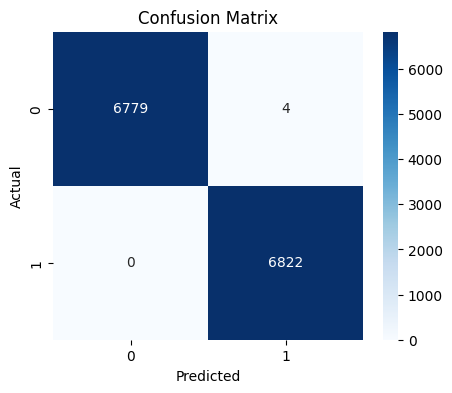

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


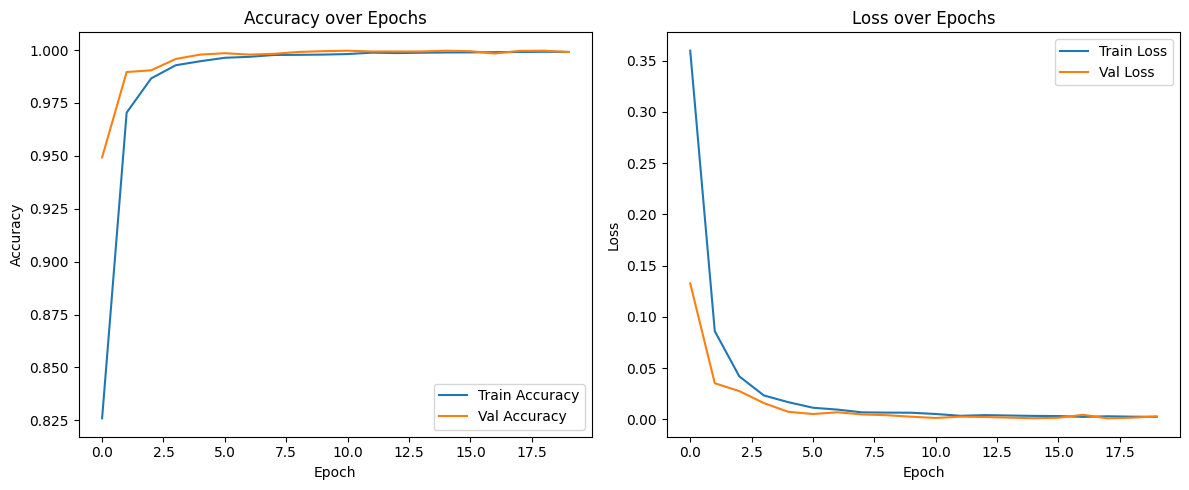

In [16]:
# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9999989626920527


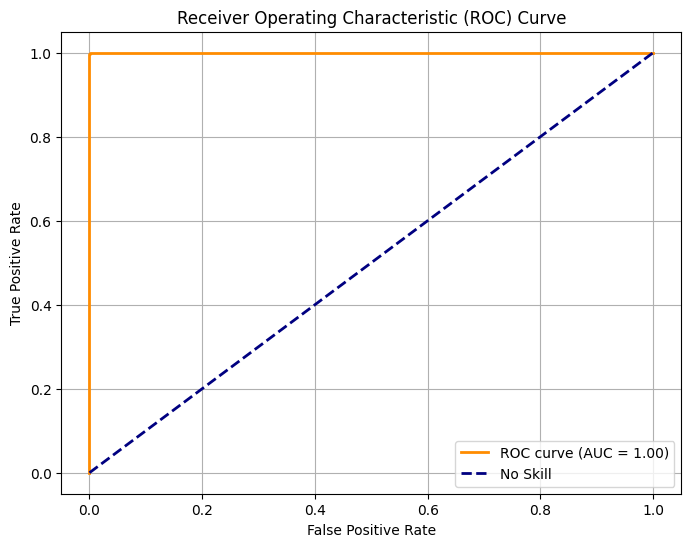

In [17]:
# Predict the probabilities for the test set
y_probs = model.predict(image_test)

# Predict the classes for the test set
# y_pred = model.predict([ELA_test, SRM_test])
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Alternatively, directly from true labels and probabilities:
print(roc_auc_score(y_test, y_probs))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()